In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


- pandas → data handling

- numpy → numerical operations

- matplotlib & seaborn → visualization


In [28]:
features = pd.read_csv('features.csv')
labels = pd.read_csv('labels.csv')


In [29]:
features.head()


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [30]:
labels.head()


,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [31]:
features.shape, labels.shape


((26707, 36), (26707, 3))

- features.csv → contains independent variables

- labels.csv → contains target variables

- We will merge them before modeling

## Merge Features & Labels

In [32]:
data = pd.concat([features, labels], axis=1)


In [34]:
data.head()



,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,2,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,3,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,4,0,0


In [35]:
data.shape


(26707, 39)

- Features and labels are aligned row-wise

- concat(axis=1) ensures correct mapping

- This creates one modeling-ready dataset

In [37]:
print(labels.columns)


Index(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], dtype='object')


- This is a multi-label classification problem

- We predict probability of vaccination

- Each target is binary (0 = No, 1 = Yes)

In [38]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

## Separate Numerical & Categorical Columns

In [40]:
cat_cols = data.select_dtypes(include='object').columns
num_cols = data.select_dtypes(exclude='object').columns

print("Categorical Columns:", len(cat_cols))
print("Numerical Columns:", len(num_cols))



Categorical Columns: 12
Numerical Columns: 27


## Missing Values Analysis

In [41]:
missing_values = data.isnull().sum().sort_values(ascending=False)
missing_values[missing_values > 0]


employment_occupation          13470
employment_industry            13330
health_insurance               12274
income_poverty                  4423
doctor_recc_seasonal            2160
doctor_recc_h1n1                2160
rent_or_own                     2042
employment_status               1463
marital_status                  1408
education                       1407
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
opinion_seas_sick_from_vacc      537
opinion_seas_risk                514
opinion_seas_vacc_effective      462
opinion_h1n1_sick_from_vacc      395
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
household_adults                 249
household_children               249
behavioral_avoidance             208
behavioral_touch_face            128
h1n1_knowledge                   116
h1n1_concern                      92
behavioral_large_gatherings       87
behavioral_outside_home           82
b

- Missing data is common in survey datasets

- We do not drop rows blindly

- Handling depends on feature nature

In [42]:
missing_percent = (data.isnull().sum() / len(data)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
missing_percent


employment_occupation          50.436215
employment_industry            49.912008
health_insurance               45.957989
income_poverty                 16.561201
doctor_recc_seasonal            8.087767
doctor_recc_h1n1                8.087767
rent_or_own                     7.645936
employment_status               5.477965
marital_status                  5.272026
education                       5.268282
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
opinion_seas_sick_from_vacc     2.010709
opinion_seas_risk               1.924589
opinion_seas_vacc_effective     1.729884
opinion_h1n1_sick_from_vacc     1.479013
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
household_children              0.932340
household_adults                0.932340
behavioral_avoidance            0.778822
behavioral_touch_face           0.479275
h1n1_knowledge                  0.434343
h1n1_concern    

In [43]:
labels.mean()


respondent_id       13353.000000
h1n1_vaccine            0.212454
seasonal_vaccine        0.465608
dtype: float64

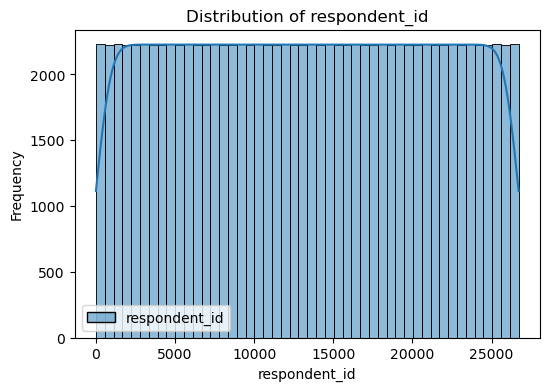

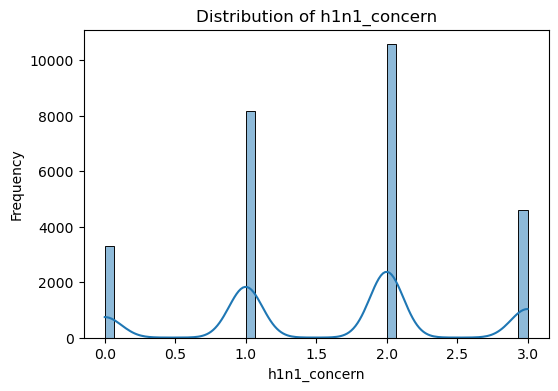

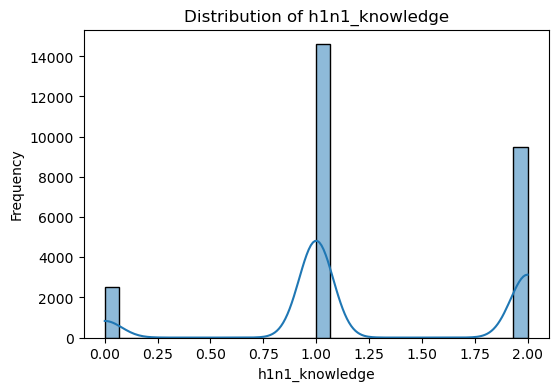

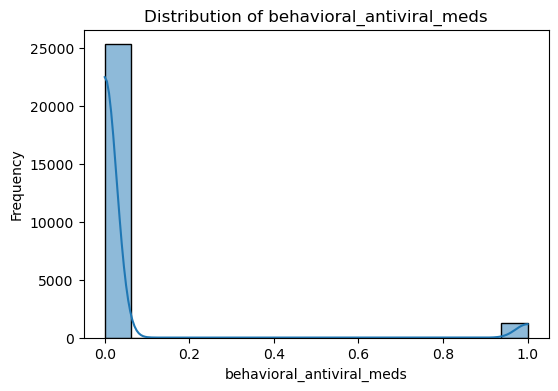

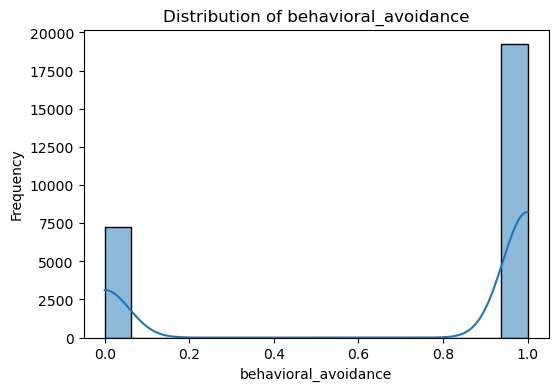

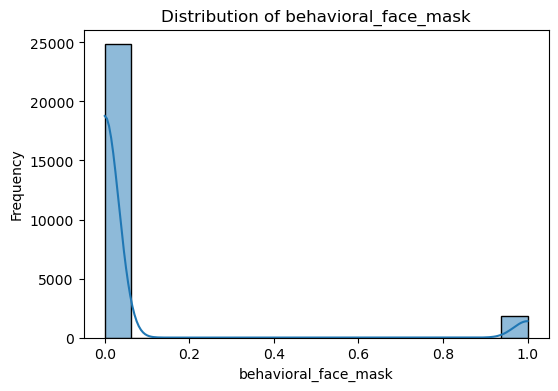

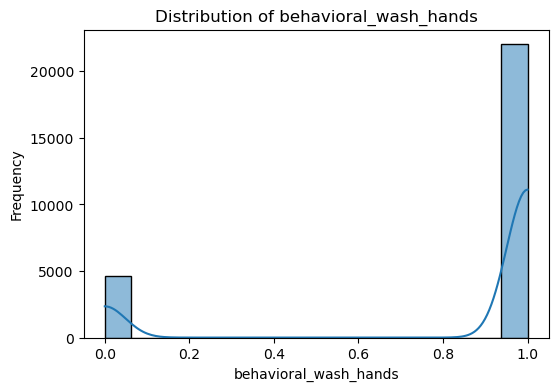

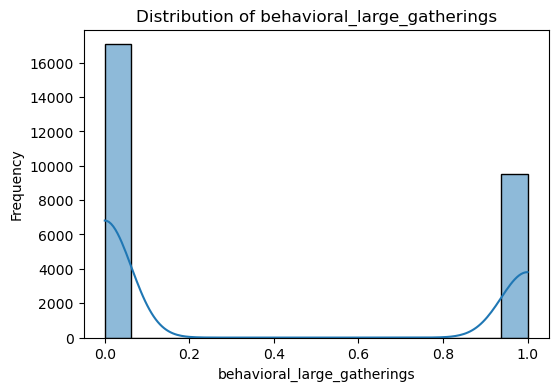

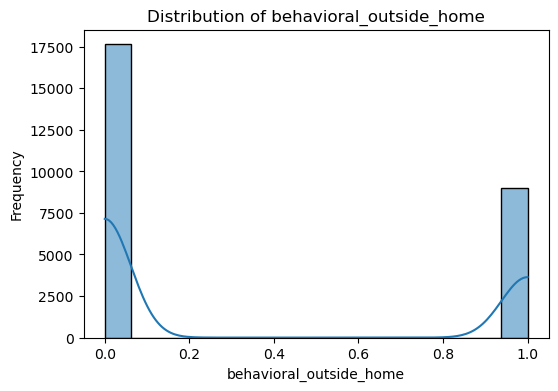

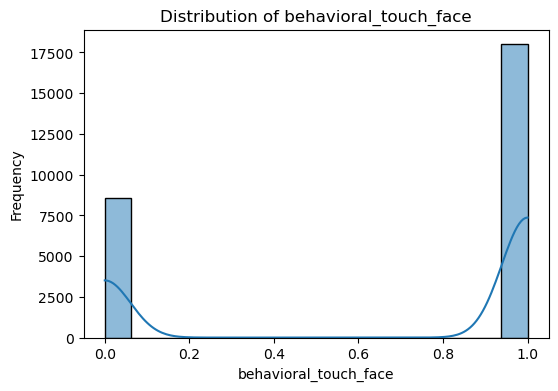

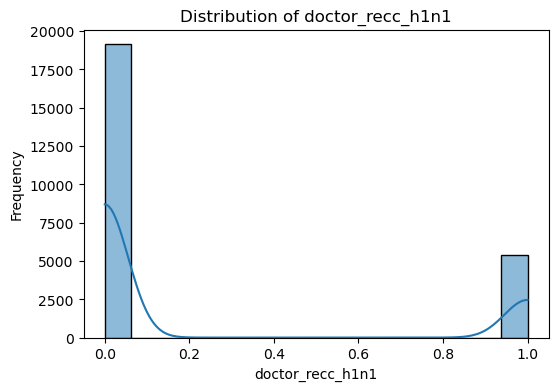

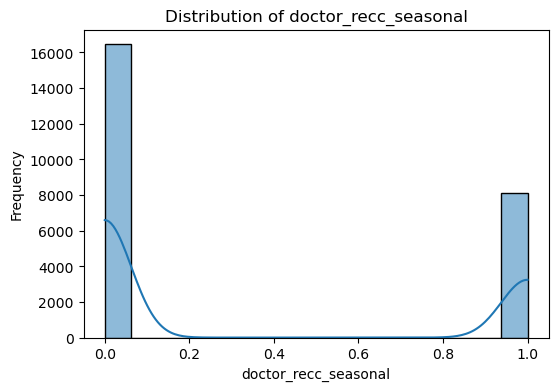

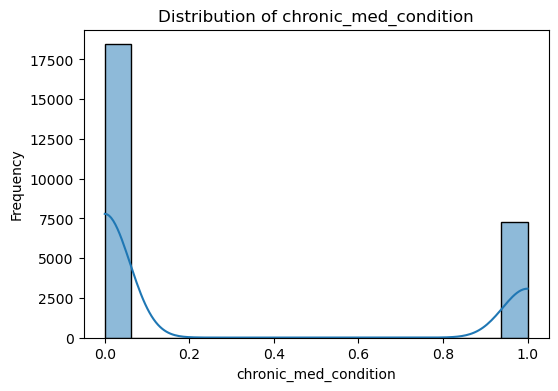

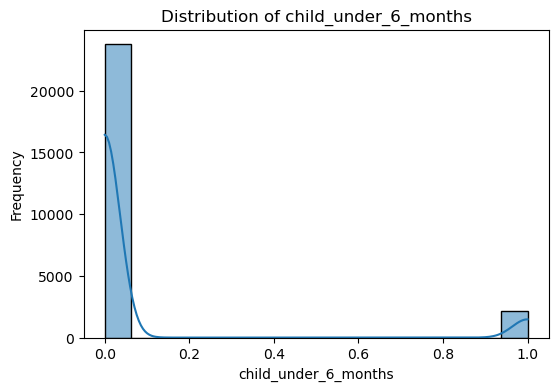

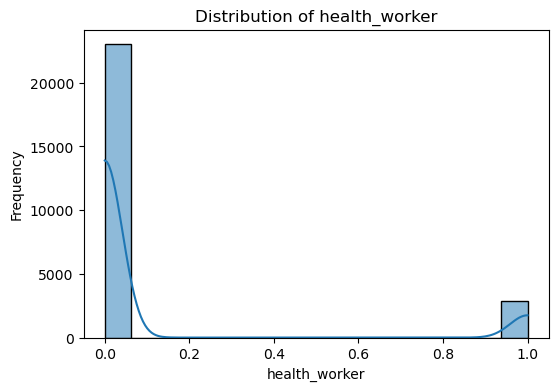

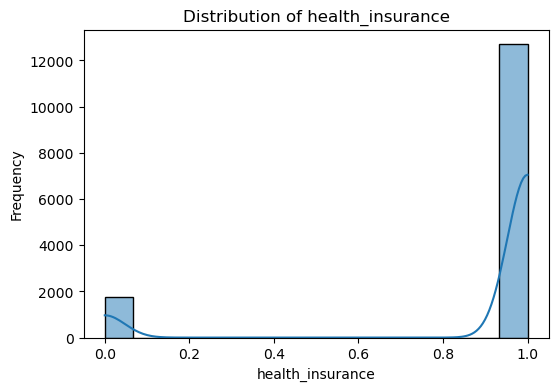

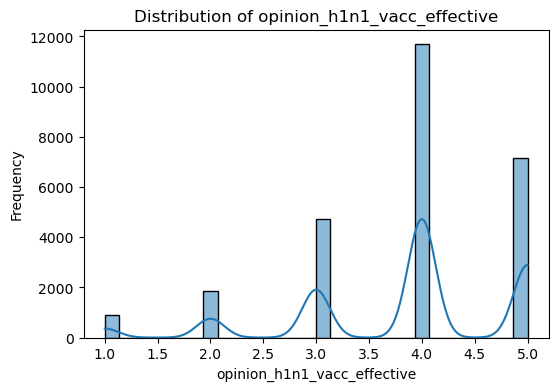

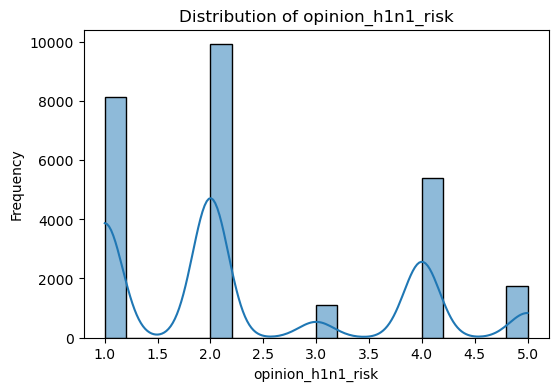

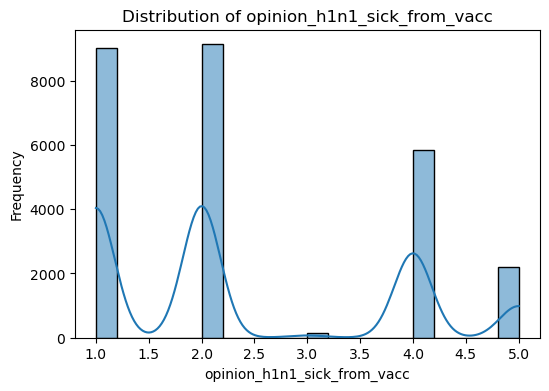

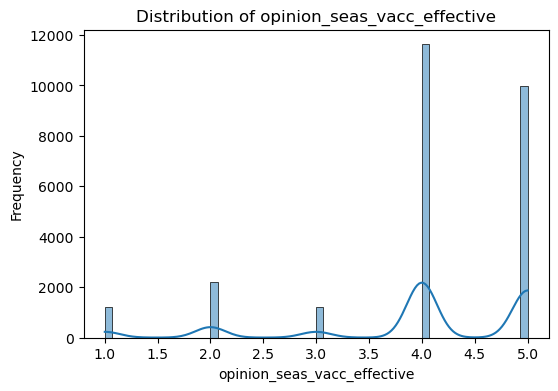

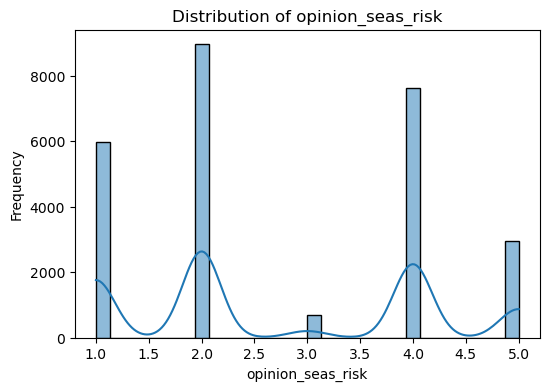

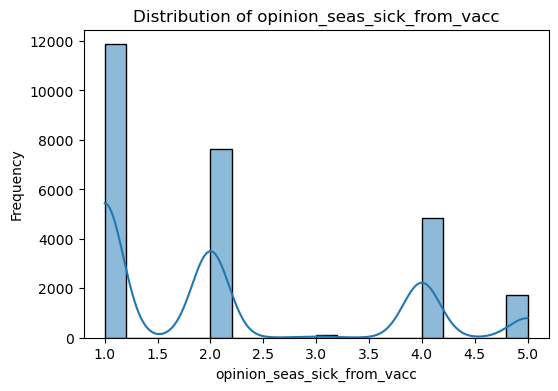

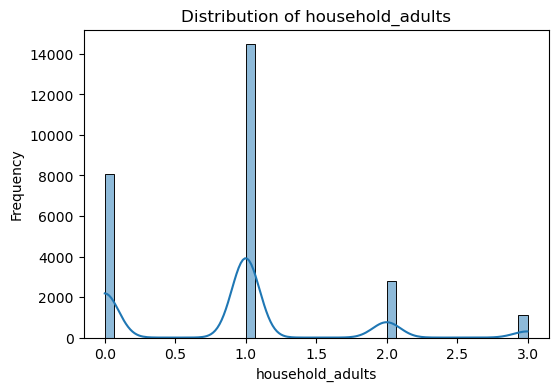

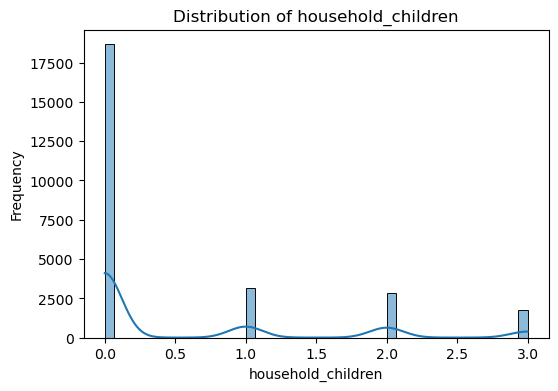

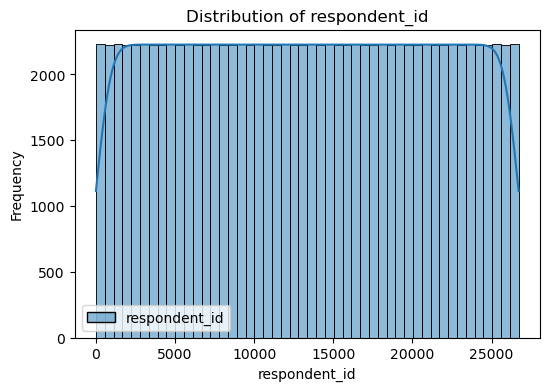

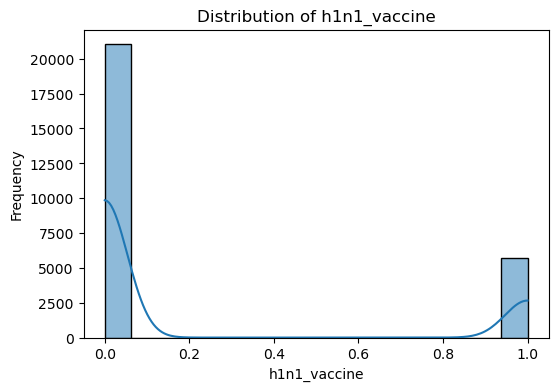

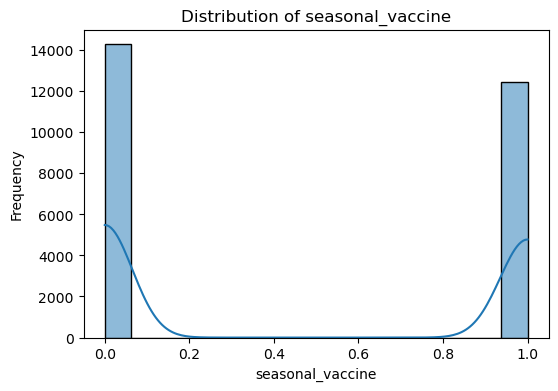

In [46]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


- Understanding data distribution

- Detecting skewness

- Identifying outliers

- kde=True provides a smooth density curve for better interpretation

- Individual plots make analysis clearer and more readable

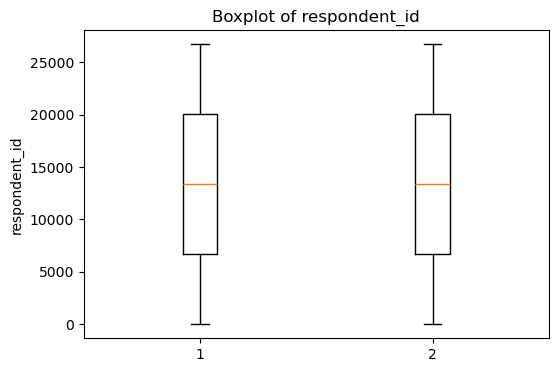

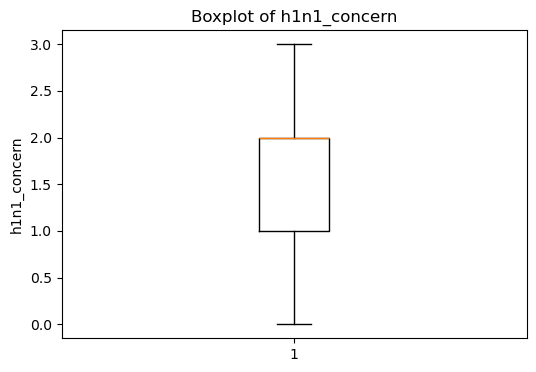

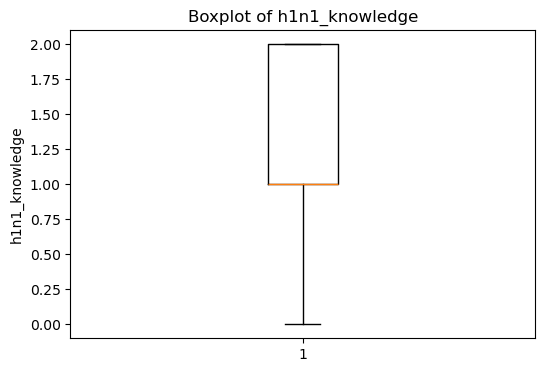

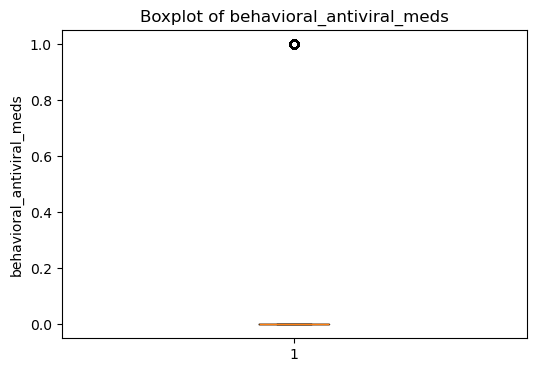

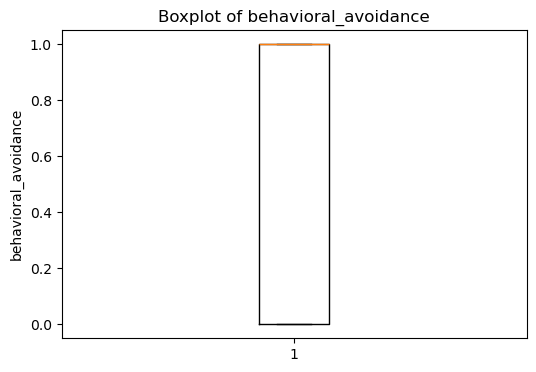

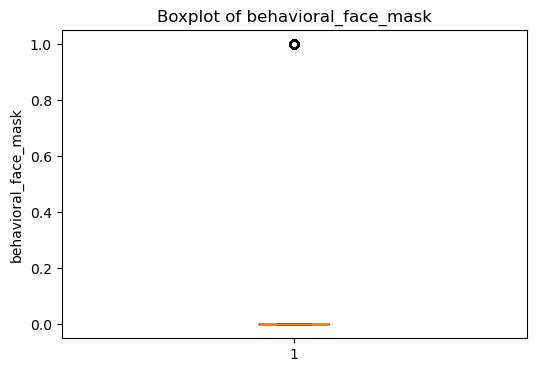

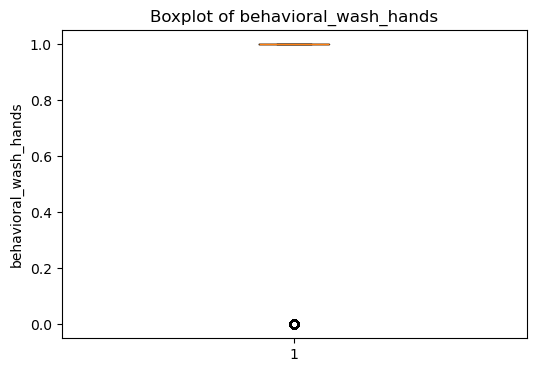

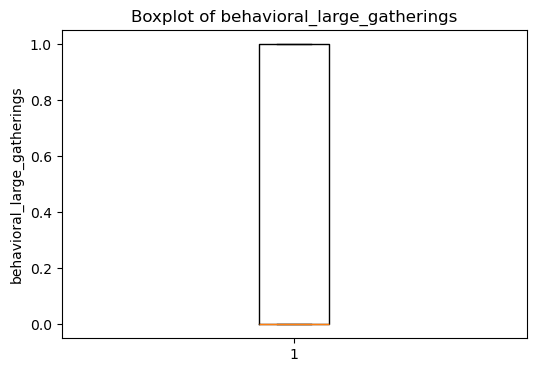

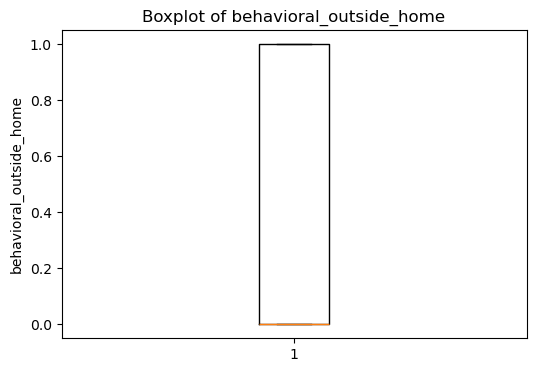

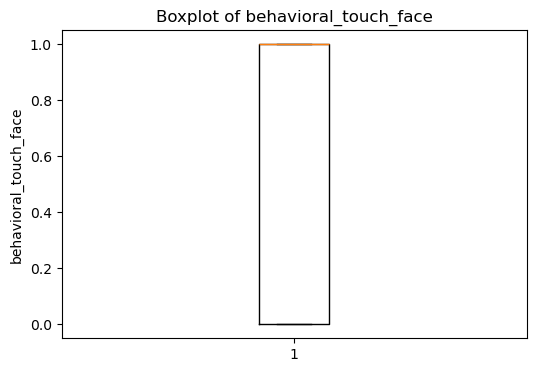

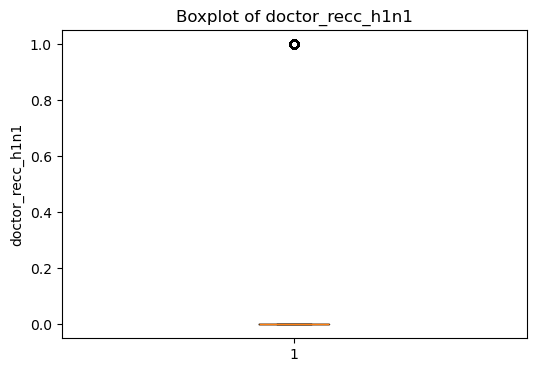

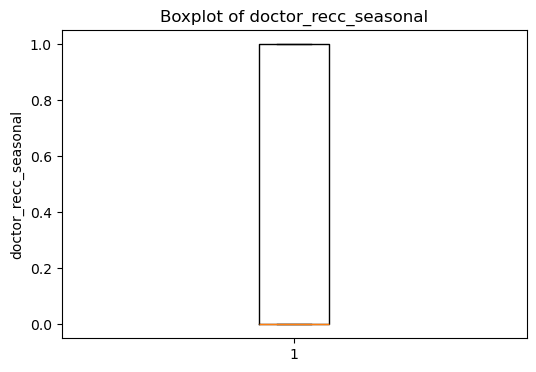

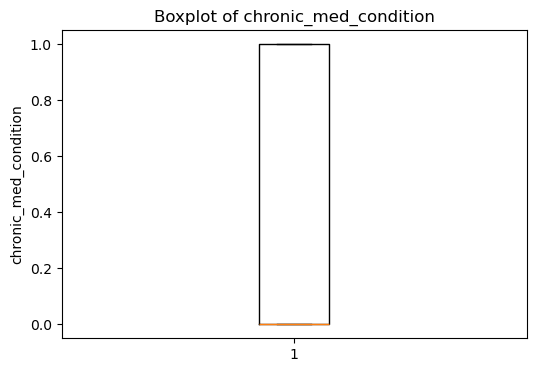

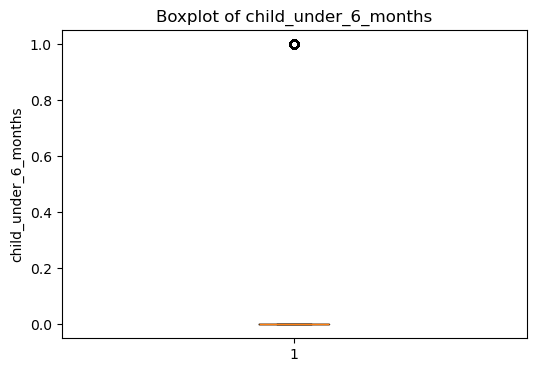

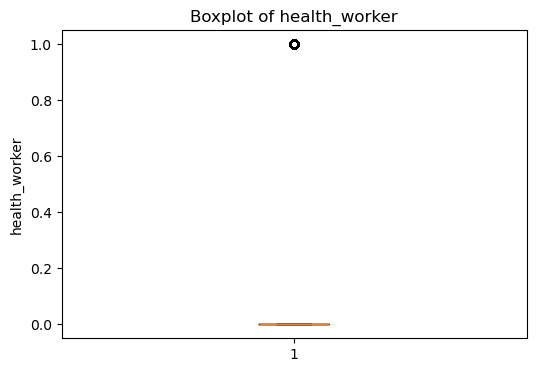

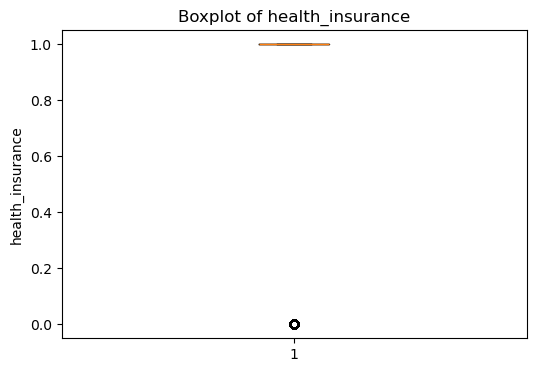

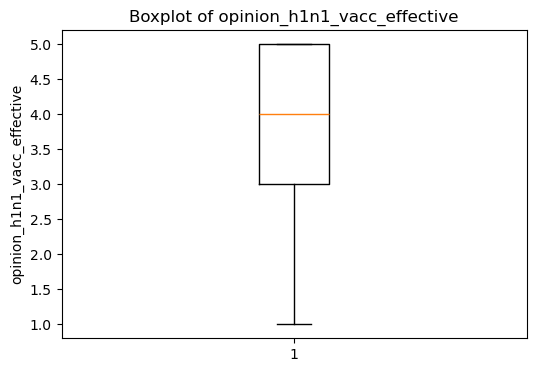

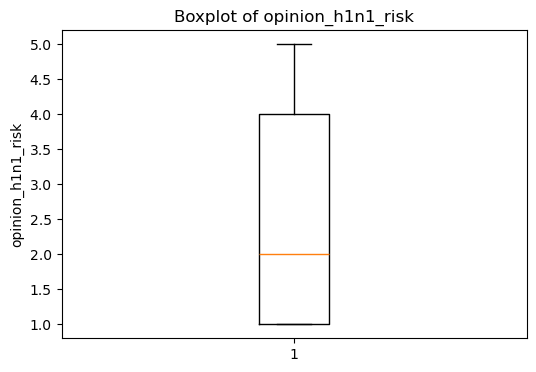

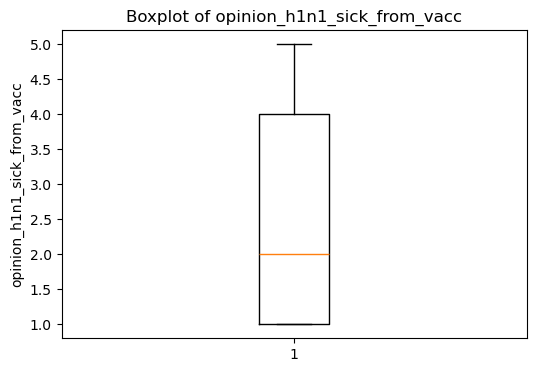

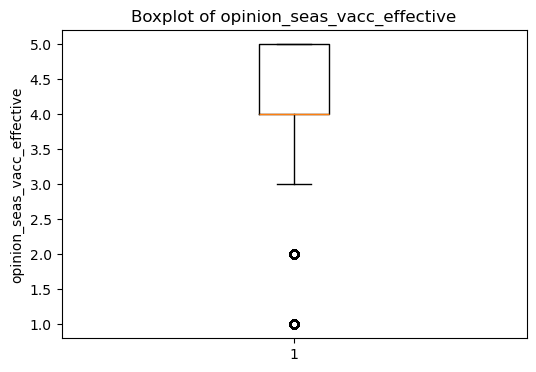

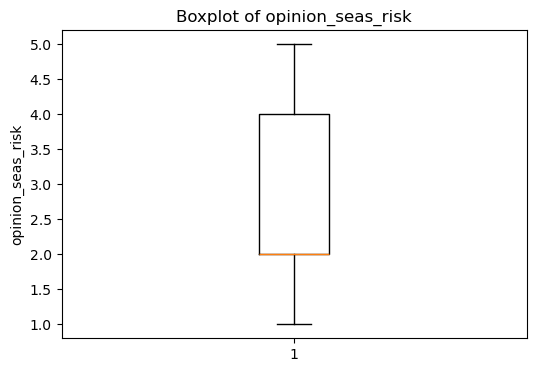

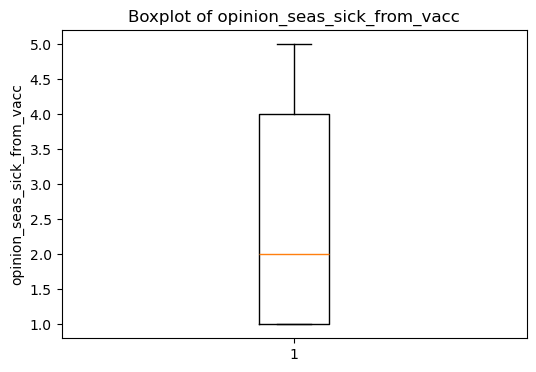

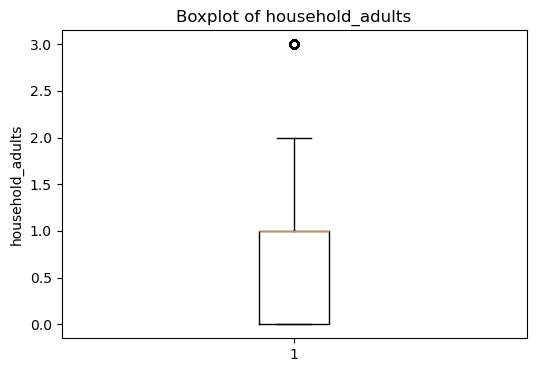

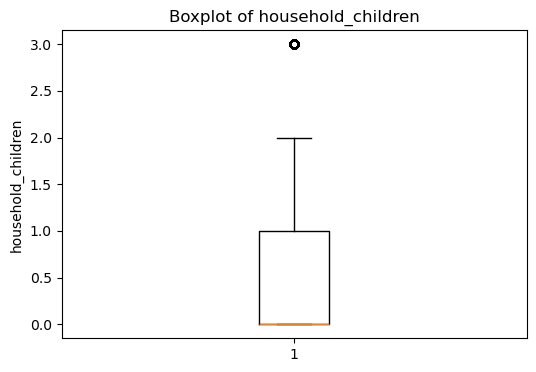

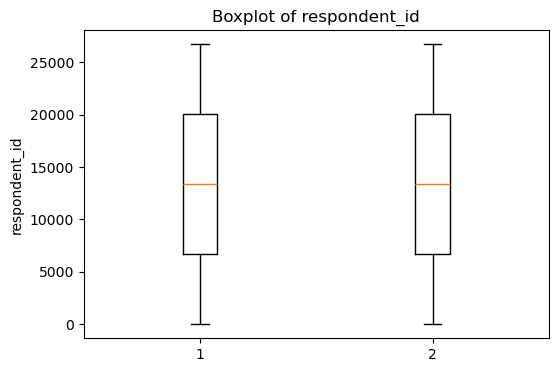

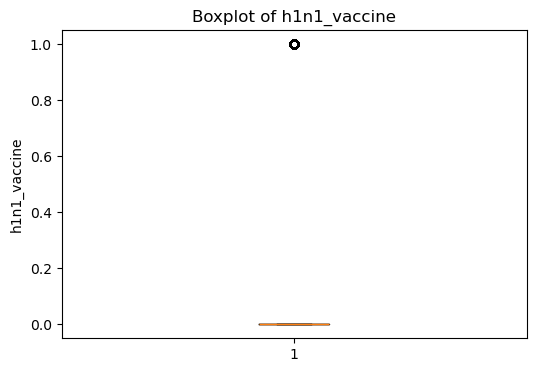

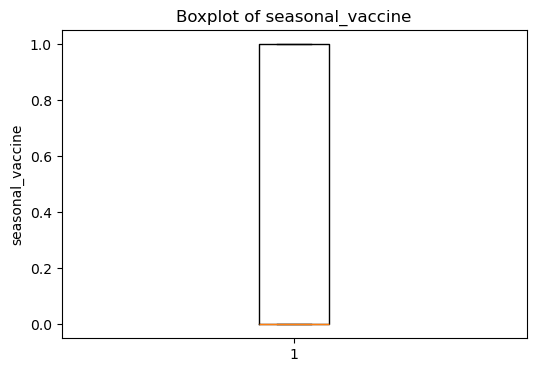

In [66]:
for col in num_cols:
    series = data[col].dropna()
    


    plt.figure(figsize=(6, 4))
    plt.boxplot(series, vert=True)
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()


 - Boxplots were generated using Matplotlib to ensure stable visualization of numerical features.
Columns with insufficient variability were excluded, as boxplots are not meaningful for constant values.
This approach avoids visualization errors and provides reliable outlier detection in survey-based data.

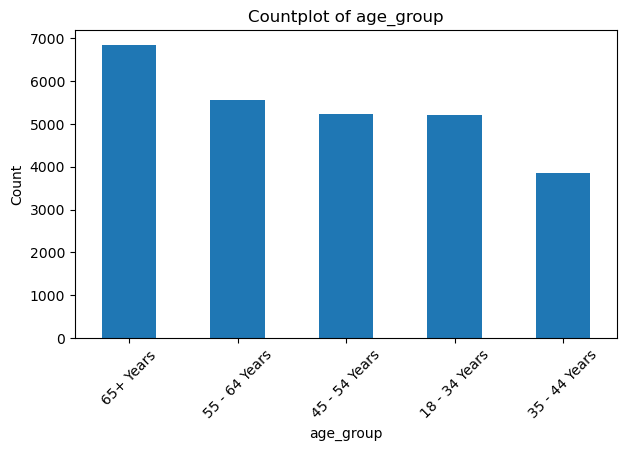

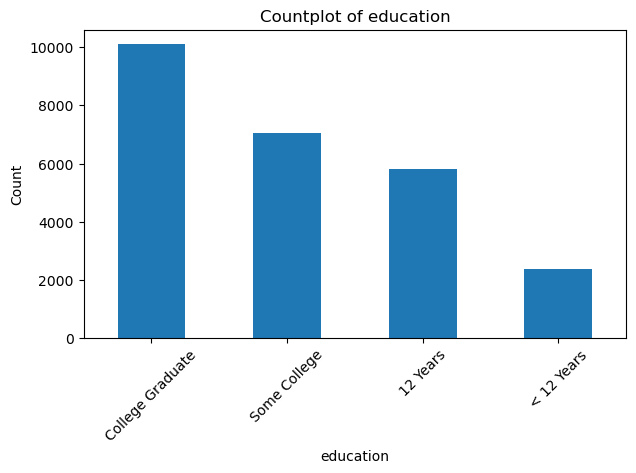

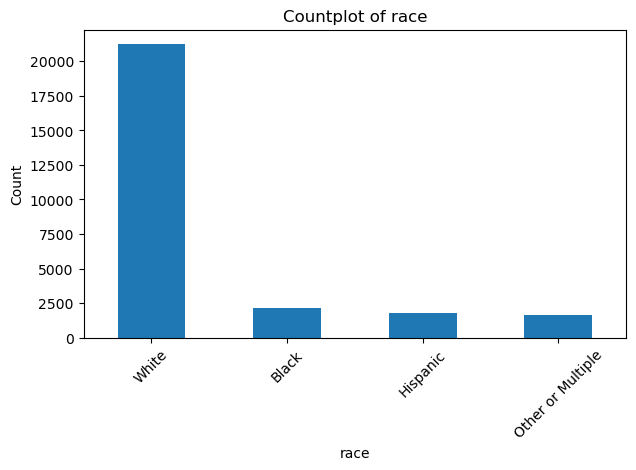

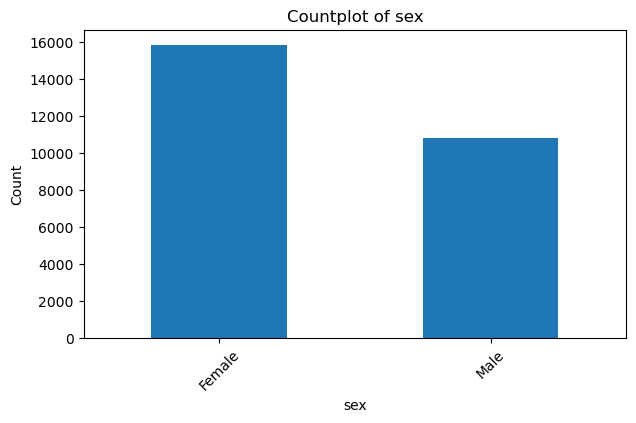

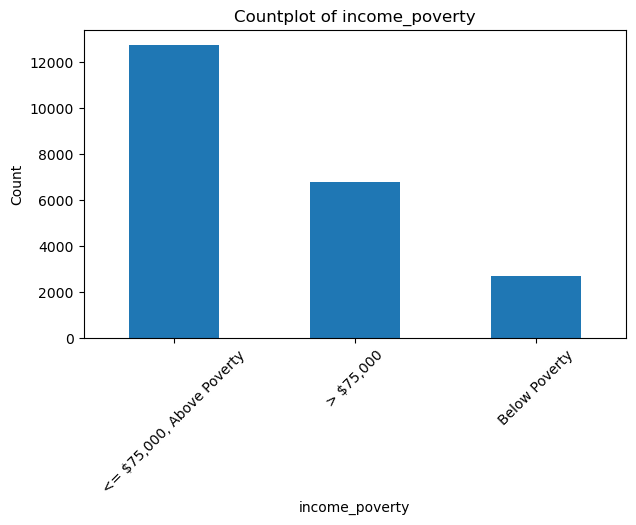

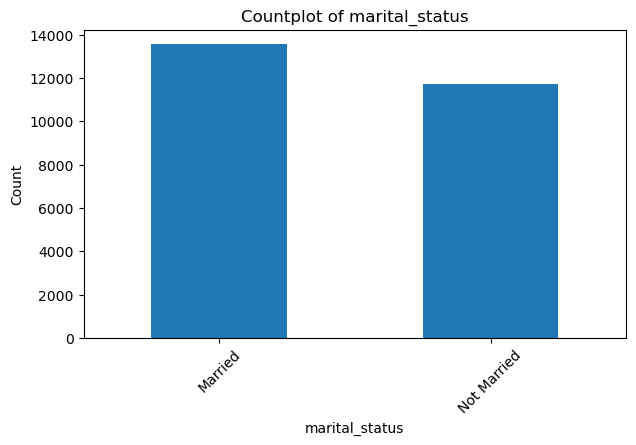

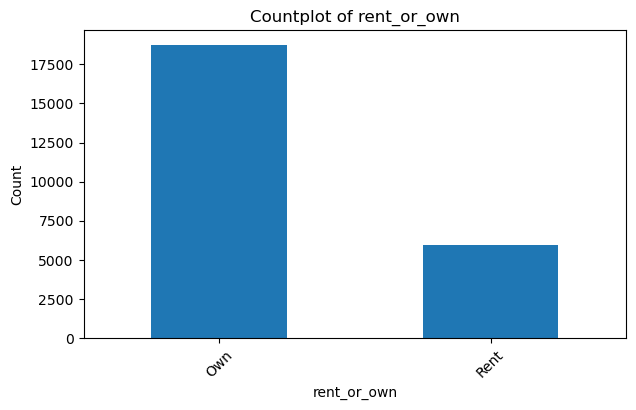

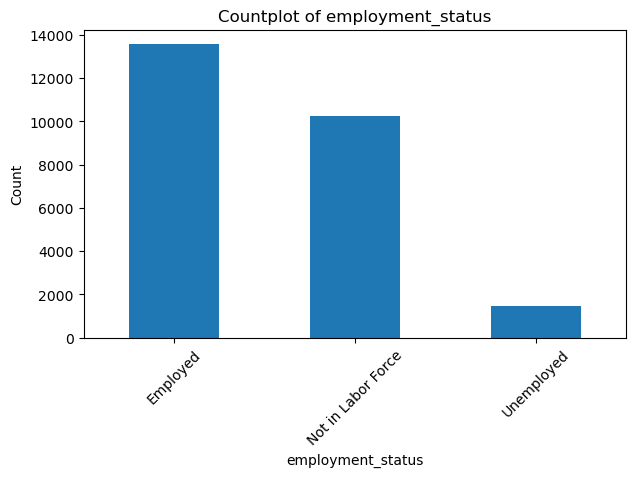

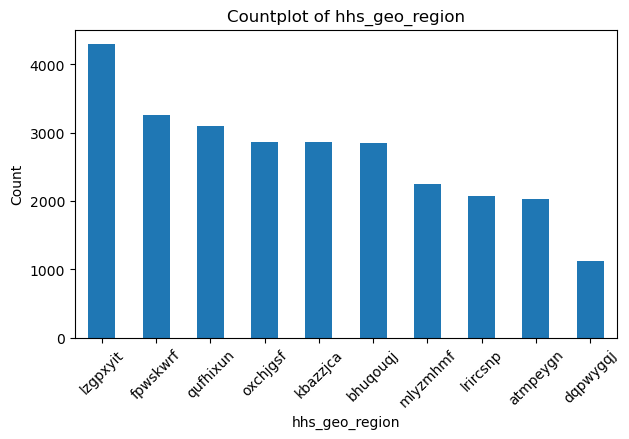

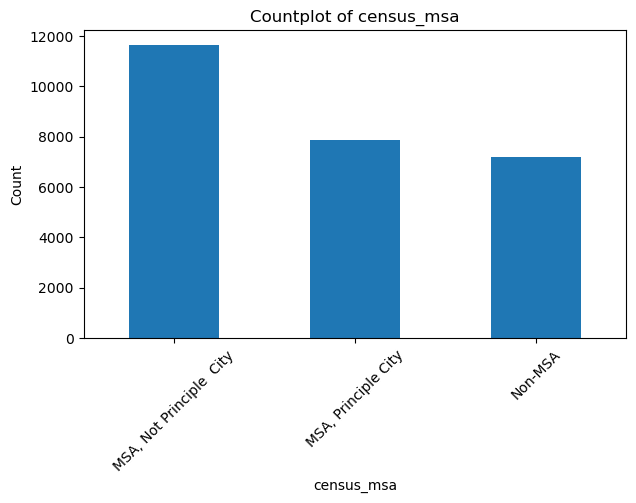

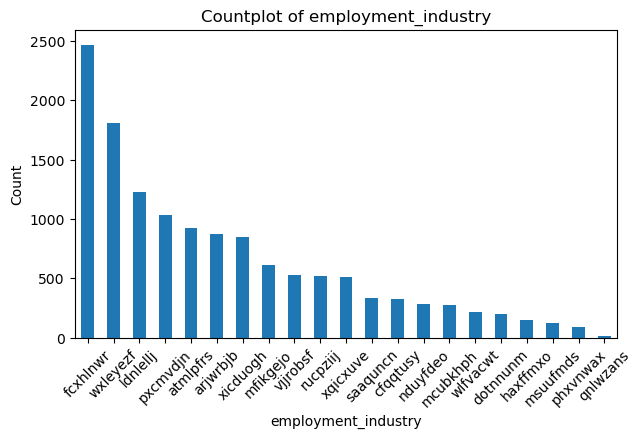

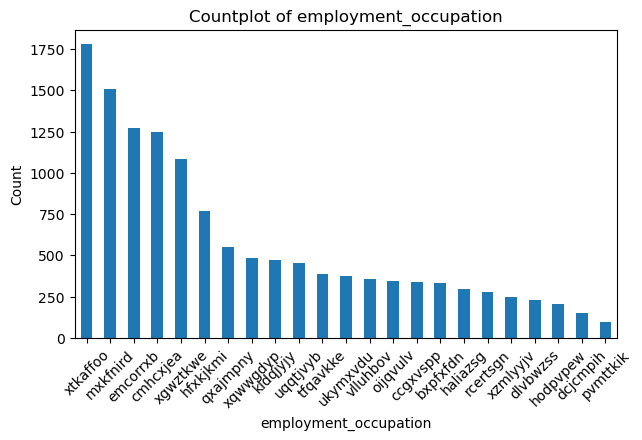

In [67]:
for col in cat_cols:
    plt.figure(figsize=(7, 4))
    data[col].value_counts().plot(kind='bar')
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


- Countplots were generated for all categorical features to understand the distribution of survey responses.
This analysis helps identify dominant categories, rare responses, and potential imbalance in categorical variables.
Such insights are critical for selecting appropriate encoding techniques during feature engineering.